
**Predict disease risk from Patient data.**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/cirrhosis.csv")

#Exploratory Data Analysis

In [ ]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
df.shape

(418, 20)

In [ ]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [ ]:
df.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
print(df.isnull().sum())

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


In [ ]:
float_cols = list(df.columns[df.dtypes == np.float64])
int_cols = list(df.columns[df.dtypes == np.int64])
num_cols = float_cols+int_cols
num_cols

['Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage',
 'ID',
 'N_Days',
 'Age']

In [ ]:
cat_cols = list(df.columns[df.dtypes == object])
cat_cols

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

#Data Cleaning

In [ ]:
for i in num_cols:
  df[i].fillna(df[i].median(), inplace=True)
df.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol        0
Albumin            0
Copper             0
Alk_Phos           0
SGOT               0
Tryglicerides      0
Platelets          0
Prothrombin        0
Stage              0
dtype: int64

**fillna():** Filling the missing values with median because the data is skewed.skewed data means the data is not symmetrical and it is not distributed around the mean. The data is skewed to the left or right. The data is skewed to the left if the mean is less than the median and the data is skewed to the right if the mean is greater than the median.

In [ ]:
for i in cat_cols:
  df[i].fillna(df[i].mode().values[0], inplace=True)
df.isna().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

Filling the missing values with mode because the data is categorical.

**inplace=True** means the changes are saved in the original dataframe.

In [ ]:
df['Age'] = df['Age']//365

converting the age from days to years by dividing it by 365.

In [ ]:
df.Sex.unique()

array(['F', 'M'], dtype=object)

In [ ]:
df.Sex = df.Sex.map({
    "F" : 0,
    "M" : 1
})

**map()** is used to map the values of a series to another set of values.

In [ ]:
df['Edema'] = df['Edema'].replace(['S', 'Y'], 'Y')

In [ ]:
df["Stage"] = df["Stage"].replace({1.0:2.0})

In [ ]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,58,0,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56,0,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70,1,N,N,N,Y,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,54,0,N,Y,Y,Y,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38,0,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_cols:
  df[i] = le.fit_transform(df[i])

**LabelEncoder()** is used to convert categorical data, or text data, into numbers, which our predictive models can better understand.

In [ ]:
df.corr()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,1.000000,-0.354305,-0.282416,-0.357086,0.053245,-0.083855,-0.182124,0.299714,-0.289600,-0.106538,-0.062154,-0.069327,-0.128924,-0.171115,-0.350981,-0.060318,-0.110382,-0.076032,-0.191959,-0.043241
N_Days,-0.354305,1.000000,-0.416651,0.054742,-0.127958,-0.007386,-0.247090,-0.287832,-0.180715,-0.271732,-0.403953,-0.099322,0.430829,-0.295723,0.152368,-0.187930,-0.111453,0.146144,-0.110685,-0.362630
Status,-0.282416,-0.416651,1.000000,0.006015,0.187720,0.118189,0.280903,0.235375,0.209041,0.277475,0.429722,0.161330,-0.261674,0.340345,0.202924,0.258939,0.180992,-0.082971,0.338382,0.312259
Drug,-0.357086,0.054742,0.006015,1.000000,-0.166262,-0.019563,0.024685,-0.113408,0.142884,-0.007974,0.074236,0.076928,0.047487,0.063790,0.058669,0.068560,0.067222,0.064259,0.051674,0.041799
Age,0.053245,-0.127958,0.187720,-0.166262,1.000000,0.160962,0.178602,0.117427,-0.085314,0.196420,0.000871,-0.146509,-0.181863,0.030546,-0.065054,-0.140765,-0.001578,-0.147231,0.112567,0.183599
Sex,-0.083855,-0.007386,0.118189,-0.019563,0.160962,1.000000,0.015873,0.016205,-0.103809,0.027345,-0.027652,0.002405,0.030351,0.222314,0.038026,0.000706,0.056923,-0.089458,0.070666,0.027331
Ascites,-0.182124,-0.247090,0.280903,0.024685,0.178602,0.015873,1.000000,0.079680,0.195960,0.409107,0.334283,-0.038174,-0.315648,0.235302,0.034538,0.101112,0.197834,-0.167323,0.268142,0.226858
Hepatomegaly,0.299714,-0.287832,0.235375,-0.113408,0.117427,0.016205,0.079680,1.000000,0.117692,0.128065,0.234372,0.064480,-0.269351,0.144227,0.023482,0.091103,0.083989,-0.182456,0.147127,0.345774
Spiders,-0.289600,-0.180715,0.209041,0.142884,-0.085314,-0.103809,0.195960,0.117692,1.000000,0.213679,0.247932,0.093853,-0.162071,0.288117,0.086869,0.145465,0.122999,-0.102217,0.196611,0.248479
Edema,-0.106538,-0.271732,0.277475,-0.007974,0.196420,0.027345,0.409107,0.128065,0.213679,1.000000,0.282617,-0.083280,-0.275728,0.187719,0.026758,0.099966,0.093510,-0.184650,0.289721,0.240467


In [ ]:
df = df[["N_Days","Prothrombin","Albumin","Platelets","Age","Bilirubin","Stage"]]
df.head()

,N_Days,Prothrombin,Albumin,Platelets,Age,Bilirubin,Stage
0,400,12.2,2.60,190.0,58,14.5,4.0
1,4500,10.6,4.14,221.0,56,1.1,3.0
2,1012,12.0,3.48,151.0,70,1.4,4.0
3,1925,10.3,2.54,183.0,54,1.8,4.0
4,1504,10.9,3.53,136.0,38,3.4,3.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x = df.iloc[:,:-1].values
x

array([[4.000e+02, 1.220e+01, 2.600e+00, 1.900e+02, 5.800e+01, 1.450e+01],
       [4.500e+03, 1.060e+01, 4.140e+00, 2.210e+02, 5.600e+01, 1.100e+00],
       [1.012e+03, 1.200e+01, 3.480e+00, 1.510e+02, 7.000e+01, 1.400e+00],
       ...,
       [1.055e+03, 9.900e+00, 3.420e+00, 1.430e+02, 5.700e+01, 1.600e+00],
       [6.910e+02, 1.040e+01, 3.750e+00, 2.690e+02, 5.800e+01, 8.000e-01],
       [9.760e+02, 1.060e+01, 3.290e+00, 3.500e+02, 5.300e+01, 7.000e-01]])

**MinMaxScaler()** is used to transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [ ]:
x_standard = sc.fit_transform(x)

#Model Training

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_standard,df.iloc[:,-1],test_size = .2, random_state = 20)

**train_test_split()** is used to split the data into training and testing data.Here the data is split into 80% training data and 20% testing data.

In [ ]:
x_train[:5]

array([[0.46823727, 0.07777778, 0.40298507, 0.56145675, 0.44230769,
        0.63898917],
       [0.29490955, 0.22222222, 0.31343284, 0.08801214, 0.28846154,
        0.03249097],
       [0.74316365, 0.23333333, 0.79477612, 0.53110774, 0.78846154,
        0.15162455],
       [0.46592343, 0.41111111, 0.32835821, 0.69195751, 0.36538462,
        0.19494585],
       [0.28986117, 0.11111111, 0.44402985, 0.1168437 , 0.80769231,
        0.09747292]])

In [ ]:
y_train[:5]

361    2.0
390    2.0
81     3.0
45     3.0
389    3.0
Name: Stage, dtype: float64

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha= 0.1)
model = clf.fit(x_train,y_train)
y_pred = model.predict(x_test)

**MultinomialNB()** is used to train the model with alpha=0.1. It is used for discrete counts. For example, let’s say, you have a text classification problem. Here you can consider Bernoulli trials which is one step further and instead of “word occurring in the document”, you have “count how often word occurs in the document”, you can think of “whether word occurs in the document or not,” you can further simplify and say, “if word occurs”. In this case, you are training your model with a multinomial distribution. It is called multinomial Naive Bayes.

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00        24
         3.0       0.43      0.94      0.59        32
         4.0       0.71      0.36      0.48        28

    accuracy                           0.48        84
   macro avg       0.38      0.43      0.35        84
weighted avg       0.40      0.48      0.38        84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


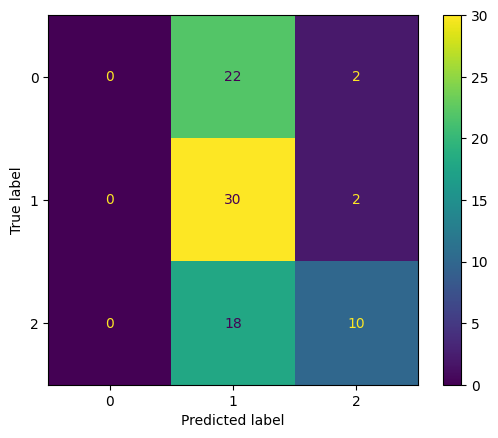

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf_GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model = clf_GBC.fit(x_train,y_train)
y_pred_GBC = model.predict(x_test)

**GradientBoostingClassifier()** is used to train the model with n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0. It is a boosting algorithm. It is used to convert weak learners into strong learners. It is used to convert weak learners into strong learners. It is a sequential process, where each subsequent model attempts to correct the errors of the previous model. The succeeding models are dependent on the previous model.

In [ ]:
print(classification_report(y_test,y_pred_GBC))

              precision    recall  f1-score   support

         2.0       0.25      0.17      0.20        24
         3.0       0.39      0.47      0.43        32
         4.0       0.53      0.57      0.55        28

    accuracy                           0.42        84
   macro avg       0.39      0.40      0.39        84
weighted avg       0.40      0.42      0.40        84



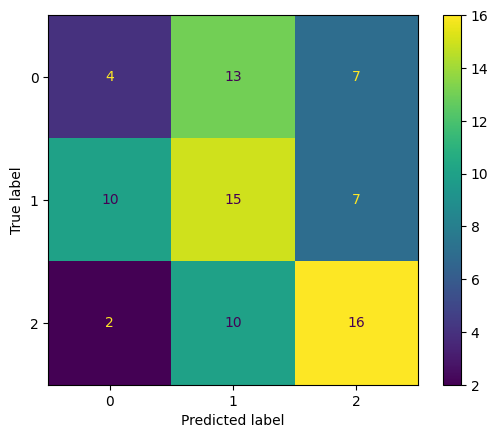

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_GBC)).plot()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(criterion="gini" , max_depth= 2 ,min_samples_split= 2)
model = clf_dt.fit(x_train,y_train)
y_pred_dt = model.predict(x_test)

**DecisionTreeClassifier()** is used to train the model with random_state=0. It is a classification algorithm. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome. It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.

In [ ]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

         2.0       0.31      0.42      0.36        24
         3.0       0.40      0.44      0.42        32
         4.0       0.65      0.39      0.49        28

    accuracy                           0.42        84
   macro avg       0.45      0.42      0.42        84
weighted avg       0.46      0.42      0.42        84



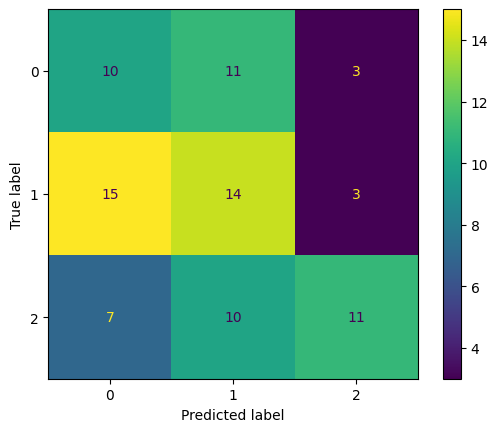

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_dt)).plot()